In [33]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


#imports
#numpy,pandas,scipy, math, matplotlib
import scipy
from math import sqrt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from math import sqrt


credit = pd.read_csv('default of credit card clients.csv', header =1)
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [34]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [35]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [36]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


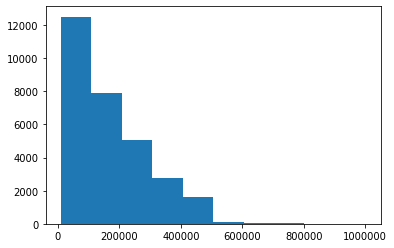

In [37]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

(array([2.3283e+04, 6.5110e+03, 2.0000e+02, 6.0000e+00]),
 array([  10000.,  257500.,  505000.,  752500., 1000000.]),
 <a list of 4 Patch objects>)

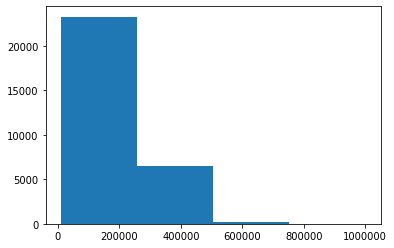

In [38]:
plt.hist(credit['LIMIT_BAL'], bins=4)

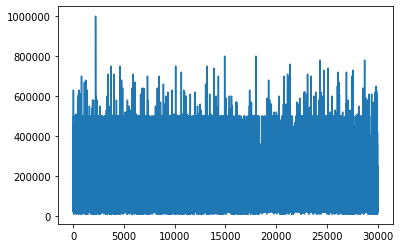

In [39]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

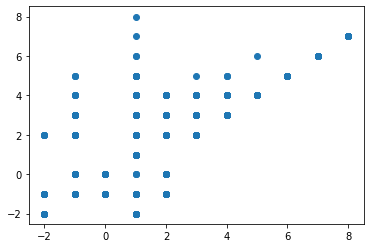

In [40]:
x = credit['PAY_0']
y = credit['PAY_2']
plt.scatter(x,y)
plt.show()

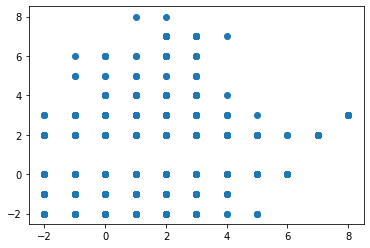

In [41]:
x = credit['PAY_0']
y = credit['PAY_6']
plt.scatter(x,y)
plt.show()

In [42]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


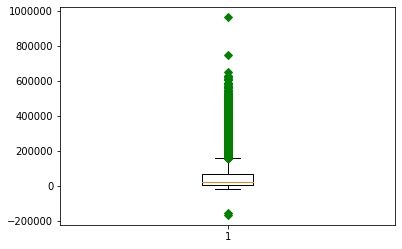

In [43]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

In [64]:
corrMat = credit.corr()
print(corrMat)

                 ID  LIMIT_BAL  MARRIAGE     PAY_0     PAY_2     PAY_3  \
ID         1.000000   0.026179 -0.029079 -0.030575 -0.011215 -0.018494   
LIMIT_BAL  0.026179   1.000000 -0.108139 -0.271214 -0.296382 -0.286123   
MARRIAGE  -0.029079  -0.108139  1.000000  0.019917  0.024199  0.032688   
PAY_0     -0.030575  -0.271214  0.019917  1.000000  0.672164  0.574245   
PAY_2     -0.011215  -0.296382  0.024199  0.672164  1.000000  0.766552   
PAY_3     -0.018494  -0.286123  0.032688  0.574245  0.766552  1.000000   
PAY_4     -0.002735  -0.267460  0.033122  0.538841  0.662067  0.777359   
PAY_5     -0.022199  -0.249411  0.035629  0.509426  0.622780  0.686775   
PAY_6     -0.020270  -0.235195  0.034345  0.474553  0.575501  0.632684   
BILL_AMT1  0.019389   0.285430 -0.023472  0.187068  0.234887  0.208473   
BILL_AMT2  0.017982   0.278314 -0.021602  0.189859  0.235257  0.237295   
BILL_AMT3  0.024354   0.283236 -0.024909  0.179785  0.224146  0.227494   
BILL_AMT4  0.040351   0.293988 -0.0233

In [45]:
covMat = credit.cov()
print(covMat)

                                      ID     LIMIT_BAL          SEX  \
ID                          7.500250e+07  2.941664e+07    78.356379   
LIMIT_BAL                   2.941664e+07  1.683446e+10  1571.050630   
SEX                         7.835638e+01  1.571051e+03     0.239247   
EDUCATION                   2.681543e+02 -2.247403e+04     0.005502   
MARRIAGE                   -1.314525e+02 -7.323670e+03    -0.008014   
AGE                         1.491057e+03  1.730767e+05    -0.409726   
PAY_0                      -2.975726e+02 -3.954593e+04    -0.031685   
PAY_2                      -1.162770e+02 -4.603765e+04    -0.041442   
PAY_3                      -1.916922e+02 -4.443225e+04    -0.038694   
PAY_4                      -2.769132e+01 -4.057181e+04    -0.034411   
PAY_5                      -2.178600e+02 -3.667056e+04    -0.030521   
PAY_6                      -2.018774e+02 -3.509308e+04    -0.024754   
BILL_AMT1                   1.236447e+07  2.727020e+09 -1211.694332   
BILL_A

In [46]:
#Change Sex type to category
credit['SEX'] = credit['SEX'].map({1: 'male', 2: 'female'})
credit['SEX'] = credit['SEX'].astype('category')
credit.groupby('SEX')['SEX'].count()

SEX
female    18112
male      11888
Name: SEX, dtype: int64

In [47]:
#Change Education type to category and group the values of others in a single value
credit['EDUCATION'] = credit['EDUCATION'].map({1: 'School', 2: 'University', 3: 'High School', 0: 'Others', 4: 'Others', 5: 'Others', 6: 'Others'})
credit['EDUCATION'] = credit['EDUCATION'].astype('category')
credit.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
High School     4917
Others           468
School         10585
University     14030
Name: EDUCATION, dtype: int64

In [48]:
#Function to determine the customer age range

def age_range(customer):
    age = customer
    
    if age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    else:
        return 'senior'

In [49]:
#Change the AGE to a range and convert into category

credit['AGE'] = credit['AGE'].apply(age_range)
credit['AGE'] = credit['AGE'].astype('category')
credit.groupby('AGE')['AGE'].count()


AGE
20s        9618
30s       11238
40s        6464
50s        2341
senior      339
Name: AGE, dtype: int64

In [50]:
#Rename column 'default payment next month' to a more friendly name
credit = credit.rename(columns={'default payment next month': 'default_nextm'})
credit['default_nextm'] = credit['default_nextm'].astype('category')
credit.groupby('default_nextm')['default_nextm'].count()

default_nextm
0    23364
1     6636
Name: default_nextm, dtype: int64

In [51]:
#Number of women with defaults
credit[(credit['SEX'] == 'female')].groupby('default_nextm')['default_nextm'].count()

default_nextm
0    14349
1     3763
Name: default_nextm, dtype: int64

In [52]:
#Number of men with defaults
credit[(credit['SEX'] == 'male')].groupby('default_nextm')['default_nextm'].count()

default_nextm
0    9015
1    2873
Name: default_nextm, dtype: int64

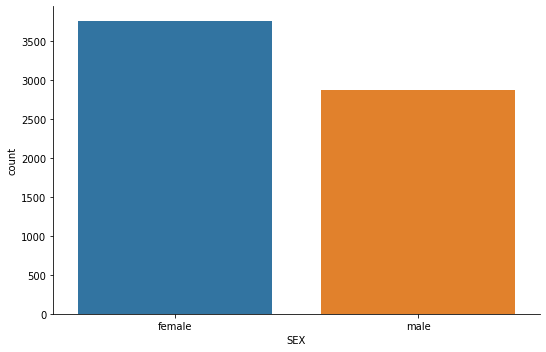

In [53]:
#Default customers by Sex
deafultYes = credit[credit['default_nextm'] == 1]
fg = sns.catplot('SEX', data=deafultYes, kind='count', aspect=1.5)
fg.set_xlabels('SEX')

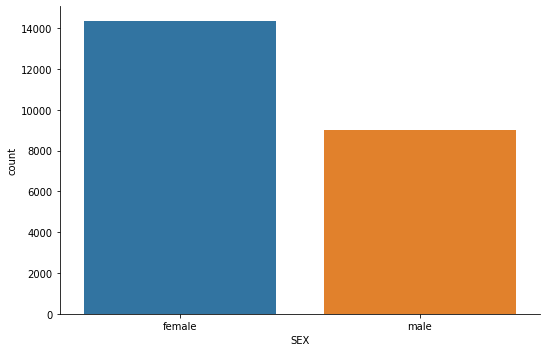

In [54]:
#Not Default customers by Sex
deafultNo = credit[credit['default_nextm'] == 0]
fg = sns.catplot('SEX', data=deafultNo, kind='count', aspect=1.5)
fg.set_xlabels('SEX')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


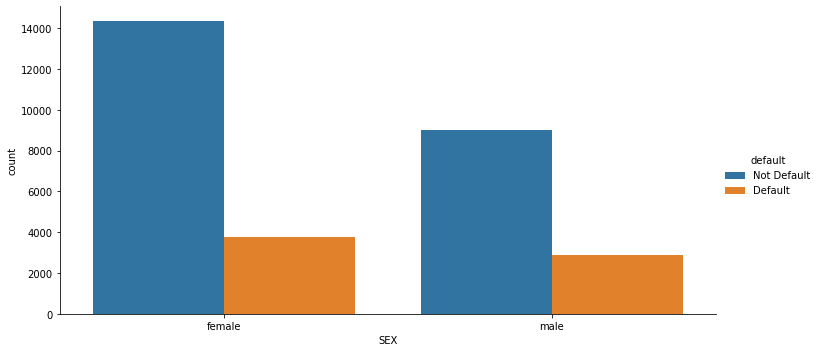

In [55]:
#Default comparison by sex
credit['default'] = credit['default_nextm'].map({0: 'Not Default', 1: 'Default'})
credit['default'] = credit['default'].astype('category')
sns.factorplot('SEX', data=credit, kind='count', hue='default', order=['female','male'], 
               hue_order=['Not Default','Default',], aspect=2)



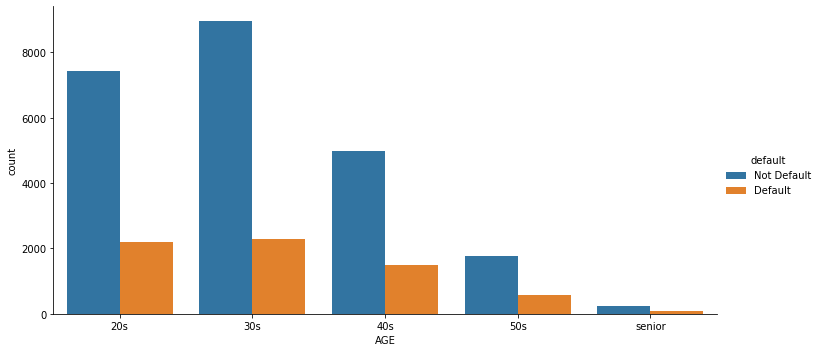

In [56]:
#Default comparison by age range
sns.factorplot('AGE', data=credit, kind='count', hue='default', order=['20s','30s','40s','50s','senior'], 
               hue_order=['Not Default','Default',], aspect=2)

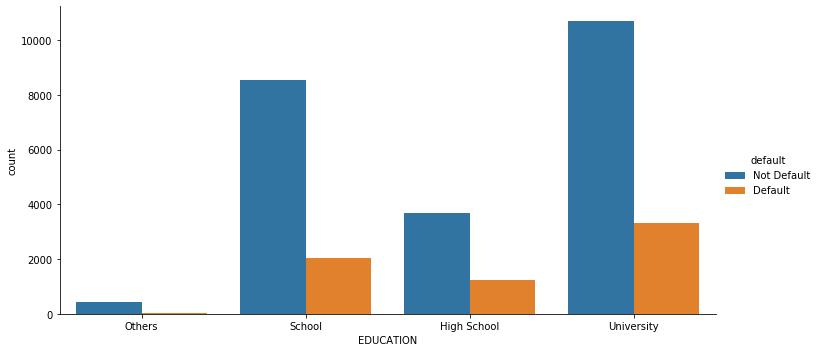

In [57]:
#Default comparison by education
sns.factorplot('EDUCATION', data=credit, kind='count', hue='default', order=['Others','School','High School','University'], 
               hue_order=['Not Default','Default',], aspect=2)

In [61]:
rawData = credit
del rawData['default_nextm']

In [130]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int32
EDUCATION    30000 non-null int32
MARRIAGE     30000 non-null int64
AGE          30000 non-null int32
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int32
dtypes: int32(4), int64(21)
memory usage:

In [129]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(rawData['SEX'].astype(str))
rawData['SEX']= le.transform(rawData['SEX'].astype(str))

le.fit(rawData['EDUCATION'].astype(str))
rawData['EDUCATION']= le.transform(rawData['EDUCATION'].astype(str))

le.fit(rawData['AGE'].astype(str))
rawData['AGE']= le.transform(rawData['AGE'].astype(str))

le.fit(rawData['default'].astype(str))
rawData['default']= le.transform(rawData['default'].astype(str))

In [131]:
#features
features = rawData.iloc[:,1:24]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,0,3,1,0,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,0,3,2,0,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,0,3,2,1,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,0,3,1,1,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,3,1,3,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [132]:
#dependent variable
depVar = rawData['default']
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,0,3,1,0,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,0,3,2,0,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,0,3,2,1,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,0,3,1,1,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,3,1,3,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [133]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0    0
1    0
2    1
3    1
4    1
Name: default, dtype: int32

In [134]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
29900      20000    1          3         2    0      0      0     -2     -2   
29901      50000    1          3         2    0      1      2      0      0   
29902     170000    1          0         2    1      0     -1      0      0   
29903     260000    1          2         1    1     -1      0     -1     -1   
29904      60000    1          0         2    1      0      0      0      0   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
29900     -2  ...          0          0          0          0         0   
29901      0  ...     103486      50590      50248      49387         0   
29902      0  ...     168955     161351     126198     124746    168096   
29903     -1  ...      13333         99         99     172104     10018   
29904      0  ...      54126      58732      59306      59728      2600   

       PAY_A

In [135]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900    0
29901    1
29902    1
29903    1
29904    0
Name: default, dtype: int32

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((750, 23), (250, 23))

In [137]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [138]:
#features
features = rawData.iloc[:,1:24]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,0,3,1,0,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,0,3,2,0,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,0,3,2,1,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,0,3,1,1,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,3,1,3,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [139]:
#dependent variable
print(depVar)

0        0
1        0
2        1
3        1
4        1
        ..
29995    1
29996    1
29997    0
29998    0
29999    0
Name: default, Length: 30000, dtype: int32


In [141]:
modelRF.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [142]:
modelSVR.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [143]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [160]:
print(cross_val_score(modelRF, X_train, y_train)) 
print(cross_val_score(modelSVR, X_train, y_train)) 
print(cross_val_score(modelLR, X_train, y_train)) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unsc

[-0.03702558  0.03676185  0.07902555]
[-0.06024356 -0.02421078 -0.00795338]
[-0.00466012  0.00400183 -0.03975454]


In [145]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[ 0.05295998 -0.11135392  0.08899924]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8326470250101901

In [146]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

[-0.06024356 -0.02421078 -0.00795338]


0.9350453146666778

In [147]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[-0.00466012  0.00400183 -0.03975454]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.11956404541003729

In [148]:
#Make Predictions
predictions = modelSVR.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.031
RMSE: 0.409
